# 第1章 量子情報の基礎

## 量子情報の基礎

ここでは、量子コンピュータの仕組みを完全に理解するために必要な量子力学をマスターし、量子コンピュータを用いてどのように行列要素の計算や固有値の推定ができるかをみていくことにする。特に、テンソル積という考え方が、量子コンピュータを深く理解するうえで必須である。テンソル積の計算は少し複雑であるが、Pythonの数式処理ライブラリSymPyでは、量子力学の代数処理がサポートされている。SymPyを用いて量子力学の理解をすすめながら、量子コンピュータにとってもっとも重要なアルゴリズムである位相推定アルゴリズムを紹介する。

### 量子ビット
古典コンピュータ（量子コンピュータではない既存のコンピュータのこと）内部では情報は 0 と 1 の２つの状態で表現されている。例えば、スイッチのオン・オフの状態や、電荷がたまった状態とそうでない状態、電圧の高・低などでその２状態を表現している。一方、量子力学では異なる２つの状態の**重ね合わせ状態**というのが許されているので、量子の世界の情報の最小単位である**“量子”ビット**は $\alpha$と$\beta$という二つの複素数を用いた複素ベクトルを用いて
$$
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right)
$$
のようにその量子状態が記述される。

$\alpha$や$\beta$はどの程度の重みで0状態と1状態が重ね合わさっているかを表しており、**複素確率振幅**と呼ばれる。
$\alpha$や$\beta$が複素数になっているのは、量子の世界では0や1といった離散的な量も波の性質をもち干渉するためである。

古典ビットの0に対応する状態は
$$
\left(
\begin{array}{c}
1 
\\
0
\end{array}
\right)
$$
1に対応する状態は
$$
\left(
\begin{array}{c}
0 
\\
1
\end{array}
\right)
$$
となる。

列ベクトルを毎回書いているとスペースが無駄なので、**ディラックのブラケット表記**という簡略化した表記を導入する。これは列ベクトルである、という量子状態の型宣言のようなもので、この記号がついていると量子状態をあらわす複素ベクトルであることが一目でわかるようになっている。

$$
|0\rangle = \left(
\begin{array}{c}
1 
\\
0
\end{array}
\right)
$$
$$
|1\rangle = \left(
\begin{array}{c}
0
\\
1
\end{array}
\right)
$$
この表記を用いると量子ビットは
$$
|\psi \rangle = \alpha |0\rangle + \beta |1\rangle 
$$
と書かれる（スペースが省略できた！）。

### 複素確率振幅の意味

複素確率振幅はいったいどのような物理的実体に対応するだろうか。実は、量子力学では観測者（人間）は直接複素確率振幅にはアクセスすることができず、**測定という操作をした時に初めて0か1かが確率的にきまる**。測定結果の確率分布に影響するのが複素確率振幅である。測定結果が0になる確率$p_0$, 1になる確率$p_1$は複素確率振幅の絶対値の2乗で表される:
$$ 
p_0 = |\alpha |^2,
\\
p_1 = |\beta |^2
$$
確率の和が1になるように、規格化条件 $|\alpha |^2 + |\beta |^2 =1$を課す。

測定を行うと、量子状態は測定結果に対応する状態に変化する。具体的には、測定結果が0の場合は$|0\rangle$、1の場合は$|1\rangle$に変化する。この測定を、正規直交基底$|0\rangle$, $|1\rangle$での射影測定と呼ぶ。$|0\rangle$, $|1\rangle$以外の正規直交基底での射影測定や、より一般の測定もあるが、ここでは扱わない。

まとめると、

- 量子状態は、大きさが１に規格化された複素ベクトルによって記述される。
- 各成分の絶対値の２乗が、測定をしたときにその成分に対応する状態を得る確率である。
- 測定後の量子状態は、測定結果に応じて$|0\rangle$または$|1\rangle$となる。

したがって、
$$
|0\rangle = \left(
\begin{array}{c}
1 
\\
0
\end{array}
\right), |1\rangle = \left(
\begin{array}{c}
0
\\
1
\end{array}
\right)
$$
は、確実に0や1が得られる古典的な状態に対応し、
$$
\frac{1}{\sqrt{2}}
(|0\rangle + |1\rangle) = \left(
\begin{array}{c}
\frac{1}{\sqrt{2}}
\\
\frac{1}{\sqrt{2}}
\end{array}
\right)
$$
は0と1が同じおもみで重ね合わさった状態であり、測定をすると0と1が確率1/2で完全にランダムに得られる。

複素確率振幅は複素数なので、
$$
\frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle ) =
\left( 
\begin{array}{c}
\frac{1}{\sqrt{2}}
\\
\frac{i}{\sqrt{2}}
\end{array}
\right)
$$
といった状態も許されている。より一般に、
$$
\frac{1}{\sqrt{2}} ( |0\rangle + e^{ i \phi } |1\rangle )
$$
なども許されている。この状態の場合、状態0に対する確率振幅 ($1/\sqrt{2}$) が正の実数であるのに対して、状態1に対する確率振幅 ($e^{i\phi}/\sqrt{2}$) は、複素平面上で$\phi$回転している。このような、重ね合わせ状態における確率振幅間の相対的な偏角のことを**位相**と呼び、量子力学全般において重要な役割を果たす。

### SymPyを用いて量子ビットを表示してみる
SymPyでは、量子状態を扱うことができる。初期化された量子ビットを準備する場合は ` Qubit() ` 関数を用いる。


In [6]:
from IPython.display import Image, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため

In [ ]:
# Google Colaboratory上でのみ実行してください
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax) {
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured";
            document.head.appendChild(script);
        }
        window.Mathjax.Hub.Config({
            'tex2jax': {
                'inlineMath': [['$', '$'], ['\\(', '\\)']],
                'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                'processEscapes': true,
                'processEnvironments': true,
                'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                'displayAlign': 'center',
            },
            'HTML-CSS': {
                'styles': {'.MathJax_Display': {'margin': 0}},
                'linebreaks': {'automatic': true},
                // Disable to prevent OTF font loading, which aren't part of our
                // distribution.
                'imageFont': null,
            },
            'messageStyle': 'none'
        });
        window.Mathjax.Hub.Configured();
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

In [ ]:
psi = Qubit('0')

In [26]:
psi #ブラケット表示

❘0⟩

In [27]:
represent(psi) #列ベクトル表示

⎡1⎤
⎢ ⎥
⎣0⎦

SymPyでは文字をシンボルとして扱うことができるので、一般的な量子ビットも簡単に書ける。

In [33]:
a, b = symbols('alpha, beta')  #a, bをシンボルとして、alpha, betaとして表示
ket0 = Qubit('0')
ket1 = Qubit('1')
psi = a * ket0 + b* ket1
psi # 状態をそのまま書くとケットで表示してくれる

α⋅❘0⟩ + β⋅❘1⟩

In [0]:
represent(psi)

もちろん具体的な数値を代入することもできる。

In [34]:
psi.subs([([a,1/sqrt(2)]),([b,1/sqrt(2)])]) # alpha, betaに具体的な数字を代入

√2⋅❘0⟩   √2⋅❘1⟩
────── + ──────
  2        2   

### 量子ビットに対する基本演算

古典計算がAND、OR、NOT、NANDなどの論理演算から
構成されるのと同様、量子計算も基本的な演算から構成される。
量子力学では時間発展（時間経過にともなう物理的な状態の変化のこと）はつねに（状態の重ね合わせに対して）線型なので、**量子コンピュータ上で許された操作は状態ベクトルに対する線型変換**ということになる
。
１つの量子ビットの量子状態は規格化された２次元複素ベクトル
として表現されるのだった。したがって、それに対する線型演算は$2 \times 2$の
複素行列によって表現される。

確率の合計は常に1であるという規格化条件から、量子操作に対応する線形演算（量子演算）に対する制限を導くことができる。各測定結果を得る確率は複素確率振幅の絶対値の2乗で与えられるので、その合計は状態ベクトルの（自分自身との）内積と一致する:
$$
|\alpha|^2 + |\beta|^2 =
(\alpha^*, \beta^*)
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right) = 1
$$
（アスタリスク $^*$ は複素共役を表す）

量子コンピュータで操作した後の状態は、量子演算に対応する線形変換を$U$とすると、
$$
U
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right)
$$
この状態についても上記の規格化条件が成り立つ必要があるので、
$$
(\alpha^*, \beta^*)
U^\dagger U
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right) = 1
$$
（ダガー $^\dagger$ は行列の転置と複素共役を両方適用したものを表し、エルミート共役という）

この関係式が任意の$\alpha$, $\beta$について成り立つ必要があるので、量子演算$U$は以下の条件を満たす**ユニタリー行列**に対応する:
$$
U^{\dagger} U = U U^{\dagger} = I
$$

ここで、用語を整理しておく。量子力学では、状態ベクトルに対する線形変換のことを**演算子** (operator) と呼ぶ。単に演算子という場合は、ユニタリーとは限らない任意の線形変換を指す。それに対して、上記のユニタリー性を満たす線形変換のことを**量子演算** (quantum gate) と呼ぶ。量子演算は、量子状態に対する演算子のうち、（少なくとも理論的には）物理的に実現可能なものと考えることができる。

１つの量子ビットに作用する基本的な量子演算
として**パウリ演算子**を導入する。
$$
\begin{eqnarray}
I&=&
\left(\begin{array}{cc}
1 & 0
\\
0 & 1
\end{array}
\right),\;\;\;
X=
\left(\begin{array}{cc}
0 & 1
\\
1 & 0
\end{array}
\right),\;\;\;
Y &=&
\left(\begin{array}{cc}
0 & -i
\\
i & 0
\end{array}
\right),\;\;\;
Z=
\left(\begin{array}{cc}
1 & 0
\\
0 & -1
\end{array}
\right).
\end{eqnarray}
$$

$X$は古典ビットの反転（NOT）に対応し
$$X|0\rangle = |1\rangle, \;\;
X|1\rangle = |0\rangle
$$
のように作用する。

重ね合わせのある量子ビットの場合は、
$|0\rangle$と$|1\rangle$の位相も
情報として保持できるので、位相を反転
$$
Z|0\rangle = |0\rangle, \;\;
Z|1\rangle = -|1\rangle
$$
させる$Z$演算子も定義されている。

例えば、
$$
Z \frac{1}{\sqrt{2}} ( |0\rangle + |1\rangle ) = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle ) 
$$
となる。

$Y = i XZ$演算子は位相の反転とビットの反転を
組み合わせたもの（全体にかかる複素数$i$を除いて）であると
考えることができる。

パウリ演算子の作用を
$$
\left( 
\begin{array}{cc}
0 & 1 
\\
1 & 0 
\end{array}
\right)
\left( 
\begin{array}{c}
1 
\\
0 
\end{array}
\right) =
\left( 
\begin{array}{c}
0
\\
1 
\end{array}
\right)
$$
のように計算してもよいが、上記のようにディラックのブラケット表記をつかって計算をしたほうが圧倒的に楽。

### SymPyを用いた一量子ビット演算
SymPyではよく使う基本演算はあらかじめ定義されている。

In [7]:
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE

演算子は何番目の量子ビットに作用するか、
というのを指定して `X(0)` のように定義する。
また、これを行列表示するときには、いくつの量子ビットの空間で表現するか 
`nqubits`というのを指定する必要がある。
まだ、量子ビットは１つしかいないので、
`X(0)`、`nqubits=1`としておこう。

In [36]:
X(0)

X 
 0

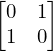

In [9]:
represent(X(0),nqubits=1)  # パウリX

同様に、`Y`, `Z`なども利用することができる。それに加え、アダマール演算 `H` や、位相演算 `S`、そして$\pi/4$の位相演算
 `T` も利用することができる：

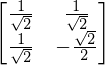

In [0]:
represent(H(0),nqubits=1)

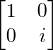

In [0]:
represent(S(0),nqubits=1)

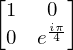

In [0]:
represent(T(0),nqubits=1)

これらの演算を状態に作用させるのは、

In [0]:
S(0)*Y(0)*X(0)*H(0)*ket0

のように `*`で書くことができる。実際に計算をする場合は `qapply()`を利用する。

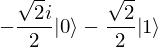

In [0]:
qapply(S(0)*Y(0)*X(0)*H(0)*ket0)

この列ベクトル表示が必要な場合は、

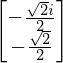

In [0]:
represent(qapply(S(0)*Y(0)*X(0)*H(0)*ket0))

のような感じで、SymPyは簡単な行列の計算はすべて自動的にやってくれる。

### ブラケット表記のまとめ（必要であればコラムへ）
列ベクトルは 
$$
|\psi \rangle = \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right)
$$
とかくのであった。これを**ケット**と呼ぶ。同様に、行ベクトルは
$$
\langle \psi | = ( |\psi \rangle ) ^{\dagger} = ( \alpha ^* , \beta ^*)
$$
とかき、これを**ブラ**と呼ぶ。${\dagger}$マークは転置と複素共役を取る操作で、列ベクトルを行ベクトルへと移す。

２つのベクトル、
$$
|\psi \rangle = \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right), \;\;\;
|\phi \rangle = \left( 
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right)
$$
があったとする。ブラとケットを抱き合わせると
$$
\langle \phi | \psi \rangle = (\gamma ^* , \delta ^* ) \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right) = \gamma ^* \alpha + \delta ^* \beta 
$$
となり、**内積**に対応する。行ベクトルと列ベクトルをそれぞれブラ・ケットと呼ぶのは、このように並べて内積を取ると「ブラケット」になるからである。

逆に、背中合わせにすると
$$
|\phi \rangle \langle \psi | = \left( 
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right) (\alpha ^* , \beta ^*) = \left( 
\begin{array}{cc}
\gamma \alpha ^*  & \gamma \beta ^* 
\\
\delta \alpha ^*   & \delta \beta ^*
\end{array}
\right)
$$
となり、演算子となる。例えば、
$$
X= |0\rangle \langle 1 | + |1\rangle \langle 0|
$$
となる。このことを覚えておけば
$$
\langle 0| 0\rangle = \langle 1 | 1\rangle = 1, \;\;\; \langle 0 | 1 \rangle = \langle 1 | 0 \rangle = 0
$$
から 
$$
X |0\rangle = |1\rangle
$$
を行列を書かずに計算できるようになる。**量子情報の解析計算においては、実際にベクトルの要素を書き下して計算をすることはほとんどなく、このようにブラケットを使って形式的に書く場合が多い**（古典計算機上で量子コンピュータをシミュレーションする場合はベクトルをすべて書き下すことになる）。

同様に、
$$
I = |0\rangle \langle 0 | + |1\rangle \langle 1| , \;\;\; Z = |0\rangle \langle 0| - |1\rangle \langle 1| 
$$
も覚えておくと便利。

### 複数量子ビットの記述

$n$個の古典ビットの状態は$n$個の$0,1$の数字によって表現され、
そのパターンの総数は$2^n$個ある。

量子力学では、これらすべてのパターンの重ね合わせ状態が許されているので、どのビット列がどのような重みで重ね合わせになっているかという$2^n$個の複素確率振幅で記述される：
$$
\begin{eqnarray}
|\psi \rangle &= & 
c_{00...0} |00...0\rangle +
c_{00...1} |00...1\rangle + \cdots +
c_{11...1} |11...1\rangle =
\left(
\begin{array}{c}
c_{00...0}
\\
c_{00...1}
\\
\vdots
\\
c_{11...1}
\end{array}
\right).
\end{eqnarray}
$$
ただし、
複素確率振幅は規格化
$\sum _{i_1,..., i_n} |c_{i_1...i_n}|^2=1$
されているものとする。

**このように$n$量子ビットの重ね合わせ状態は、
$n$に対して指数的に大きい$2^n$次元の
複素ベクトル空間で記述する必要があり、
ここに古典ビットと量子ビットの違いが顕著に現れる**。

量子コンピュータとは、量子ビット数に対して指数的なサイズの複素ベクトルを、物理法則に従ってユニタリー変換するコンピュータのことである。

ここで、複数量子ビットの順番と表記の関係について注意しておく。状態をケットで記述する際に、「1番目」の量子ビット、「2番目」の量子ビット、……の状態に対応する0と1を左から順番に並べて表記した。例えば$|011\rangle$と書けば、1番目の量子ビットが0、2番目の量子ビットが1、3番目の量子ビットが1である状態を表す。量子回路の回路図を描く場合も、通常は上から順番に1番目、2番目、……の量子ビットの信号線を描く。一方、例えば011を2進数の表記と見た場合、上位ビットが左、下位ビットが右となることに注意しよう。すなわち、一番左の0は最上位ビットであって$2^2$の位に対応し、真ん中の1は$2^1$の位、一番右の1は最下位ビットであって1の位に対応する。「$i$番目」の量子ビットは、$n$桁の2進数表記の$n-i+1$桁目に対応する。このことは、SymPyで複数量子ビットを扱う際に気を付ける必要がある（後述）。

この$n$量子ビットの量子状態を測定すると
ビット列$i_1 ... i_n$が確率
$$
\begin{eqnarray}
p_{i_1 ... i_n} &=&|c_{i_1 ... i_n}|^2
\label{eq02}
\end{eqnarray}
$$
でランダムに得られ、測定後の状態は$|i_1 \dotsc i_n\rangle$となる。

初期状態として
$$ 
|00...0\rangle 
$$
を準備したとき
$$
\left(
\begin{array}{c}
c_{00...0}
\\
c_{00...1}
\\
\vdots
\\
c_{11...1}
\end{array}
\right) =
\left(
\begin{array}{c}
1
\\
0
\\
\vdots
\\
0
\end{array}
\right)　
.
$$

2量子ビットの場合は、 00, 01, 10, 11 の４通りの状態の重ね合わせがとりうるので、その状態は一般的に
$$
c_{00} |00\rangle + c_{01} |01\rangle + c_{10}|10\rangle + c_{11} |11\rangle  = 
\left( 
\begin{array}{c}
c_{00}
\\
c_{01}
\\
c_{10}
\\
c_{11}
\end{array}
\right)
$$
とかける。2量子ビットに対する演算は$4 \times 4$行列で書け、4行4列の行列成分はそれぞれ$|00\rangle,|01\rangle,|10\rangle, |01\rangle$
成分に対応する。

２量子ビットに作用する演算としてもっとも重要なのが制御NOT演算（CNOT）
$$
\begin{eqnarray}
\Lambda(X) =
\left(
\begin{array}{cccc}
1 & 0 & 0& 0
\\
0 & 1 & 0& 0
\\
0 & 0 & 0 & 1
\\
0 & 0 & 1& 0
\end{array}
\right)
\end{eqnarray}
$$
がある。

この演算が2量子ビットにどのように作用するか見てみよう。まず、1つ目の量子ビットが$|0\rangle$の場合、$c_{10} = c_{11} = 0$なので、
$$
\Lambda(X)
\left(
\begin{array}{c}
c_{00}\\
c_{01}\\
0\\
0
\end{array}
\right) =
\left(
\begin{array}{c}
c_{00}\\
c_{01}\\
0\\
0
\end{array}
\right)
$$
となり、状態は変化しない。次に、1つ目の量子ビットが$|1\rangle$の場合、$c_{00} = c_{01} = 0$なので、
$$
\Lambda(X)
\left(
\begin{array}{c}
0\\
0\\
c_{10}\\
c_{11}
\end{array}
\right) =
\left(
\begin{array}{c}
0\\
0\\
c_{11}\\
c_{10}
\end{array}
\right)
$$
となり、$|10\rangle$と$|11\rangle$の確率振幅が入れ替わる。すなわち、2つ目の量子ビットを反転することになる。

つまり、

- １つめの量子ビットが$|0\rangle$の場合は何もしない（恒等演算$I$が作用）。
- １つめの量子ビットが$|1\rangle$の場合は、２つめの量子ビットを反転させる（$X$が作用）。

１つ目の量子ビットを**制御量子ビット**、２つめの量子ビットを**ターゲット量子ビット**と呼ぶ。

制御NOT演算の作用は、$\oplus$を mod 2の足し算として、
$$
\begin{eqnarray}
\Lambda(X) |ij \rangle = |i \;\; (i\oplus j)\rangle
\end{eqnarray}
$$
と書けるので、古典計算における排他的論理和（XOR）を可逆にしたものである。
例えば、１つめの量子ビットを$|0\rangle$と$|1\rangle$の
重ね合わせ状態にし、２つめの量子ビットを$|0\rangle$として
$$
\begin{eqnarray}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle )\otimes |0\rangle =
\frac{1}{\sqrt{2}}
\left(
\begin{array}{c}
1
\\
0
\\
1
\\
0
\end{array}
\right)
\end{eqnarray}
$$
にCNOTを作用させると、
$$
\begin{eqnarray}
\frac{1}{\sqrt{2}}( |00\rangle + |11\rangle ) =
\frac{1}{\sqrt{2}}
\left(
\begin{array}{c}
1
\\
0
\\
0
\\
1
\end{array}
\right)
\end{eqnarray}
$$
が得られる。（記号$\otimes$については次節参照）

**例** CNOT ゲートを組み合わせることでSWAP ゲートを作ることができる。
$$\Lambda(X)_{i,j}$$ を$i$番目の量子ビットを制御、$j$番目の量子ビットをターゲットとするCNOT ゲートとして、
$$
\begin{align}
\mathrm{SWAP} &= \Lambda(X)_{1,2} \Lambda(X)_{2,1} \Lambda(X)_{1,2}\\
&=
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}
\right)
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{array}
\right)
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}
\right)\\
&=
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{array}
\right)
\end{align}
$$
のように書ける。これは1 番目の量子ビットと2 番目の量子ビットが交換するゲートであることが分かる。

このことは、上記のmod 2の足し算$\oplus$を使った表記で簡単に確かめることができる。3つのCNOTゲート$\Lambda(X)_{1,2} \Lambda(X)_{2,1} \Lambda(X)_{1,2}$の$|ij\rangle$への作用を1ステップずつ書くと、$i \oplus (i \oplus j) = (i \oplus i) \oplus j = 0 \oplus j = j$であることを使って、
$$
\begin{align}
|ij\rangle &\longrightarrow
|i \;\; (i\oplus j)\rangle\\
&\longrightarrow
|(i\oplus (i\oplus j)) \;\; (i\oplus j)\rangle =
|j \;\; (i\oplus j)\rangle\\
&\longrightarrow
|j \;\; (j\oplus (i\oplus j))\rangle =
|ji\rangle
\end{align}
$$
となり、2つの量子ビットが交換されていることが分かる。

### テンソル積の計算
手計算や解析計算で威力を発揮するのは、**テンソル積**（$\otimes$）である。
これは、複数の量子ビットがある場合に、それをどのようにして、上で見た大きな一つのベクトルへと変換するのか？という計算のルールを与えてくれる。

量子力学の世界では、２つの量子系があってそれぞれの状態が$|\psi \rangle$と$|\phi \rangle$のとき、
$$
|\psi \rangle \otimes |\phi\rangle
$$
とテンソル積 $\otimes$ を用いて書く。このような複数の量子系からなる系のことを**複合系**と呼ぶ。例えば２量子ビット系は複合系である。

基本的にはテンソル積は、**多項式と同じような計算ルール**で計算してよい。
例えば、
$$ 
(\alpha |0\rangle + \beta |1\rangle )\otimes (\gamma |0\rangle + \delta |1\rangle )
= \alpha \gamma |0\rangle |0\rangle + \alpha \delta |0\rangle |1\rangle + \beta \gamma |1 \rangle | 0\rangle + \beta \delta |1\rangle |1\rangle 
$$
のように計算する。列ベクトル表示すると、$|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$に対応する4次元ベクトル、
$$
\left(
\begin{array}{c}
\alpha
\\
\beta
\end{array}
\right)
\otimes 
\left(
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right) =
\left(
\begin{array}{c}
\alpha \gamma
\\
\alpha \delta
\\
\beta \gamma
\\
\beta \delta
\end{array}
\right)
$$
を得る計算になっている。


### SymPyを用いたテンソル積の計算


In [0]:
a,b,c,d = symbols('alpha,beta,gamma,delta')
psi = a*Qubit('0')+b*Qubit('1')
phi = c*Qubit('0')+d*Qubit('1')

In [0]:
TensorProduct(psi, phi) #テンソル積

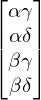

In [0]:
represent(TensorProduct(psi, phi))

さらに$|\psi\rangle$とのテンソル積をとると８次元のベクトルになる：


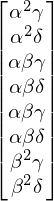

In [0]:
represent(TensorProduct(psi,TensorProduct(psi, phi)))

### 演算子のテンソル積
演算子についても何番目の量子ビットに作用するのか、というのをテンソル積をもちいて表現することができる。たとえば、１つめの量子ビットには$A$という演算子、2つめの演算子には$B$を作用させるという場合には、
$$ A \otimes B$$
としてテンソル積演算子が与えられる。
$A$と$B$をそれぞれ、2×2の行列とすると、$A\otimes B$は4×4の行列として
$$
\left(
\begin{array}{cc}
a_{11} & a_{12}
\\
a_{21} & a_{22}
\end{array}
\right)
\otimes 
\left(
\begin{array}{cc}
b_{11} & b_{12}
\\
b_{21} & b_{22}
\end{array}
\right) =
\left(
\begin{array}{cccc}
a_{11} b_{11} & a_{11} b_{12} & a_{12} b_{11} & a_{12} b_{12}
\\
a_{11} b_{21} & a_{11} b_{22} & a_{12} b_{21} & a_{12} b_{22}
\\
a_{21} b_{11} & a_{21} b_{12} & a_{22} b_{11} & a_{22} b_{12}
\\
a_{21} b_{21} & a_{21} b_{22} & a_{22} b_{21} & a_{22} b_{22}
\end{array}
\right)
$$
のように計算される。



テンソル積状態 
$$|\psi \rangle \otimes | \phi \rangle $$ 
に対する作用は、
$$ (A|\psi \rangle ) \otimes (B |\phi \rangle )$$
となり、それぞれの部分系$|\psi \rangle$と$|\phi\rangle$に$A$と$B$が作用する。
足し算に対しては、多項式のように展開してそれぞれの項を作用させればよい。
$$
(A+C)\otimes (B+D) |\psi \rangle \otimes | \phi \rangle =
(A \otimes B +A \otimes D + C \otimes B + C \otimes D) |\psi \rangle \otimes | \phi \rangle\\ =
(A|\psi \rangle) \otimes (B| \phi \rangle)
+(A|\psi \rangle) \otimes (D| \phi \rangle)
+(C|\psi \rangle) \otimes (B| \phi \rangle)
+(C|\psi \rangle) \otimes (D| \phi \rangle)
$$


テンソル積やテンソル積演算子は左右横並びで書いているが、本当は
$$
\left(
\begin{array}{c}
A
\\
\otimes 
\\
B
\end{array}
\right)
\begin{array}{c}
|\psi \rangle 
\\
\otimes 
\\
|\phi\rangle
\end{array}
$$
のように縦に並べた方がその作用の仕方わかりやすいのかもしれない。

例えば、CNOT演算を用いて作られるエンタングル状態は、
$$
\left(
\begin{array}{c}
|0\rangle \langle 0|
\\
\otimes 
\\
I
\end{array}
+
\begin{array}{c}
|1\rangle \langle 1|
\\
\otimes 
\\
X
\end{array}
\right)
\left(
\begin{array}{c}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
\\
\otimes 
\\
|0\rangle
\end{array}
\right) =
\frac{1}{\sqrt{2}}\left(
\begin{array}{c}
|0 \rangle 
\\
\otimes 
\\
|0\rangle
\end{array}
+
\begin{array}{c}
|1 \rangle 
\\
\otimes 
\\
|1\rangle
\end{array}
\right)
$$
のようになる。

### SymPyを用いた演算子のテンソル積
SymPyで演算子を使用する時は、何桁目の量子ビットに作用する演算子かを常に指定する。「何番目」ではなく2進数表記の「何桁目」であることに注意しよう。$n$量子ビットのうちの$i$番目の量子ビットを指定する場合、SymPyのコードでは`n-i`を指定する（0を基点とするインデックス）。

`H(0)` は、1量子ビット空間で表示すると

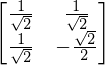

In [0]:
represent(H(0),nqubits=1)

2量子ビット空間では$H \otimes I$に対応しており、その表示は

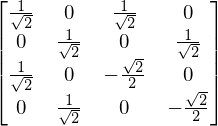

In [4]:
represent(H(1),nqubits=2)

CNOT演算は、

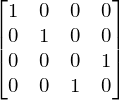

In [0]:
represent(CNOT(1,0),nqubits=2)

パウリ演算子のテンソル積$X\otimes Y \otimes Z$も、

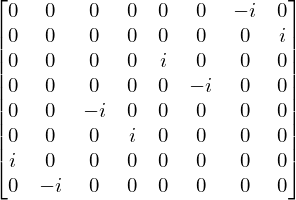

In [5]:
represent(X(2)*Y(1)*Z(0),nqubits=3)

このようにして、上記のテンソル積のルールを実際にたしかめてみることができる。

### 複数の量子ビットに対する測定

複数の量子ビットを全て測定した場合の測定結果の確率については上で説明した。複数の量子ビットのうち、一部だけを測定することもできる。その場合、測定結果の確率は、測定結果に対応する（部分系の）基底で射影したベクトルの長さの2乗になり、測定後の状態は射影されたベクトルを規格化したものになる。

具体的に見ていこう。以下の$n$量子ビットの状態を考える。
\begin{align}
|\psi\rangle &=
c_{00...0} |00...0\rangle +
c_{00...1} |00...1\rangle + \cdots +
c_{11...1} |11...1\rangle\\
&= \sum_{i_1 \dotsc i_n} c_{i_1 \dotsc i_n} |i_1 \dotsc i_n\rangle =
\sum_{i_1 \dotsc i_n} c_{i_1 \dotsc i_n} |i_1\rangle \otimes \cdots \otimes |i_n\rangle
\end{align}
1番目の量子ビットを測定するとしよう。1つ目の量子ビットの状態空間の正規直交基底$|0\rangle$, $|1\rangle$に対する射影演算子はそれぞれ$|0\rangle\langle0|$, $|1\rangle\langle1|$と書ける。1番目の量子ビットを$|0\rangle$に射影し、他の量子ビットには何もしない演算子
$$
|0\rangle\langle0| \otimes I \otimes \cdots \otimes I
$$
を使って、測定値0が得られる確率は
$$
\bigl\Vert \bigl(|0\rangle\langle0| \otimes I \otimes \cdots \otimes I\bigr) |\psi\rangle \bigr\Vert^2 =
\langle \psi | \bigl(|0\rangle\langle0| \otimes I \otimes \cdots \otimes I\bigr) | \psi \rangle
$$
ここで
$$
\bigl(|0\rangle\langle0| \otimes I \otimes \cdots \otimes I\bigr) | \psi \rangle =
\sum_{i_2 \dotsc i_n} c_{0 i_2 \dotsc i_n} |0\rangle \otimes |i_2\rangle \otimes \cdots \otimes |i_n\rangle
$$
なので、求める確率は
$$
p_0 = \sum_{i_2 \dotsc i_n} |c_{0 i_2 \dotsc i_n}|^2
$$
となり、測定後の状態は
$$
\frac{1}{\sqrt{p_0}}\sum_{i_2 \dotsc i_n} c_{0 i_2 \dotsc i_n} |0\rangle \otimes |i_2\rangle \otimes \cdots \otimes |i_n\rangle
$$
となる。0と1を入れ替えれば、測定値1が得られる確率と測定後の状態が得られる。

ここで求めた$p_0$, $p_1$の表式は、測定値$i_1, \dotsc, i_n$が得られる同時確率分布$p_{i_1, \dotsc, i_n}$から計算される$i_1$の周辺確率分布と一致することに注意しよう。実際、
$$
\sum_{i_2, \dotsc, i_n} p_{i_1, \dotsc, i_n} = \sum_{i_2, \dotsc, i_n} |c_{i_1, \dotsc, i_n}|^2 = p_{i_1}
$$

測定される量子ビットを増やし、最初の$k$個の量子ビットを測定する場合も同様に計算できる。測定結果$i_1, \dotsc, i_k$を得る確率は
$$
p_{i_1, \dotsc, i_k} = \sum{i_{k+1}, \dotsc, i_n} |c_{i_1, \dotsc, i_n}|^2
$$
であり、測定後の状態は
$$
\frac{1}{\sqrt{p_{i_1, \dotsc, i_k}}}\sum_{i_{k+1} \dotsc i_n} c_{i_1 \dotsc i_n} |i_1\rangle \otimes \cdots \otimes |i_n\rangle
$$

SymPyを使ってさらに具体的な例を見てみよう。H演算とCNOT演算を組み合わせて作られる状態を考えよう。
$$
|\psi\rangle = \Lambda(X) (H \otimes H) |0\rangle \otimes |0\rangle = \frac{|00\rangle + |10\rangle + |01\rangle + |11\rangle}{2}
$$

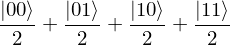

In [30]:
psi = qapply(CNOT(1, 0)*H(1)*H(0)*Qubit('00'))
psi

1つ目の量子ビットを測定して0だった場合の確率は
$$
p_0 = \langle \psi | \bigl( |0\rangle\langle0| \otimes I \bigr) | \psi \rangle =
\left(\frac{\langle 00 | + \langle 10 | + \langle 01 | + \langle 11 |}{2}\right)
\left(\frac{| 00 \rangle + | 01 \rangle}{2}\right) =
\frac{1}{2}
$$
測定後の状態は
$$
\frac{1}{\sqrt{p_0}} \bigl( |0\rangle\langle0| \otimes I \bigr) | \psi \rangle =
\frac{| 00 \rangle + | 01 \rangle}{\sqrt{2}}
$$

SymPyには測定用の関数が数種類用意されている。一部の量子ビットを測定した場合の確率と測定後の状態を計算するには、`measure_partial`を用いればよい。測定する状態と、測定を行う量子ビットのインデックスを引数として渡すと、測定後の状態と測定の確率の組みがリストとして出力される。１つめの量子ビットが0だった場合の量子状態と確率は`[0]`要素を参照すればよい。

In [31]:
from sympy.physics.quantum.qubit import measure_all, measure_partial
measured_state_and_probability = measure_partial(psi, (1,))

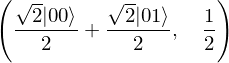

In [26]:
measured_state_and_probability[0]

上で手計算した結果と合っていることが分かる。測定結果が1だった場合も同様に計算できる。

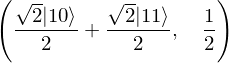

In [32]:
measured_state_and_probability[1]